In [ ]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data from github
url = 'https://raw.githubusercontent.com/taimaruuu/machine-learning/master/assn1/heart.csv?token=ADS73SCELMZFODVIB3ETT3DBKNEFA'
data_pd = pd.read_csv(url)

In [ ]:
# preview drug data
data_pd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# ensure there are no nan fields in the data (if there are any to begin with)
# notice we didn't normalize data for this example because there is no effect on it for DT
data_pd.dropna(axis=0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# sns.set_style("whitegrid");
# sns.pairplot(data_pd, hue="target", height=3);
# plt.show()

In [ ]:
# create X and Y data
x, y = data_pd.iloc[:, :-1], data_pd.iloc[:, -1:]
print(y)

# normalize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_pd = pd.DataFrame(scaled_x, columns=x.columns)
scaled_pd['target'] = y
data_pd = scaled_pd
data_pd

x, y = data_pd.iloc[:, :-1], data_pd.iloc[:, -1:]


     target
0         1
1         1
2         1
3         1
4         1
..      ...
298       0
299       0
300       0
301       0
302       0

[303 rows x 1 columns]


In [ ]:
# sns.set_style("whitegrid");
# sns.pairplot(data_pd, hue="target", height=3);
# plt.show()

In [ ]:
# create test / train split with 80 / 20 split respectively without stratifying data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

# create test / train split with 80 / 20 split respectively with stratifying data
x_train_strat, x_test_strat, y_train_strat, y_test_strat = train_test_split(x, y, test_size=0.2, random_state=11, stratify=y)

In [ ]:
from sklearn.metrics import *

no_strat_model = KNeighborsClassifier().fit(x_train, y_train.values.ravel())
strat_model = KNeighborsClassifier().fit(x_train_strat, y_train_strat.values.ravel())

y_train_pred = no_strat_model.predict(x_train)
y_test_pred = no_strat_model.predict(x_test)
print("Non-Stratified Metrics")
print("Training weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_train, y_train_pred, average='weighted')))
print("Testing weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_test, y_test_pred, average='weighted')))

print()

y_train_pred_strat = strat_model.predict(x_train_strat)
y_test_pred_strat = strat_model.predict(x_test_strat)
print("Stratified Metrics")
print("Training weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_train_strat, y_train_pred_strat, average='weighted')))
print("Testing weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_test_strat, y_test_pred_strat, average='weighted')))

Non-Stratified Metrics
Training weighted F1 on default decision tree params and no stratification: 0.8676051221505766
Testing weighted F1 on default decision tree params and no stratification: 0.7704918032786885

Stratified Metrics
Training weighted F1 on default decision tree params and no stratification: 0.9005380911922968
Testing weighted F1 on default decision tree params and no stratification: 0.8025286617379193


[0.8025286617379193, 0.8358011634056055, 0.8025286617379193, 0.8362418473470827, 0.8025286617379193, 0.8198668171058163, 0.835440551448266, 0.8032786885245902, 0.8013330931363717, 0.8025286617379193, 0.8171821025801224, 0.8344442442803099, 0.8330601092896175, 0.835440551448266]


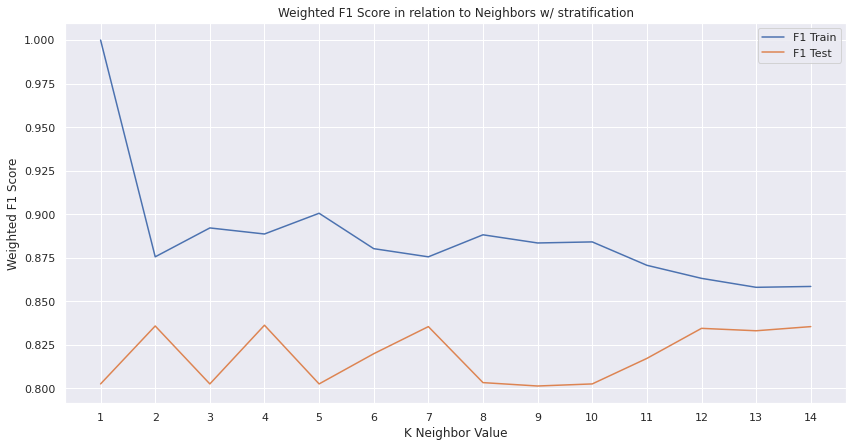

In [ ]:
# find best n_neighbor for KNN

from sklearn.metrics import f1_score
import seaborn as sns

f1_test = []
f1_train = []

typical_n = int(np.sqrt(len(x_train_strat)))

for i in range(1, typical_n):
  knn_strat = KNeighborsClassifier(n_neighbors=i)
  knn_strat.fit(x_train_strat, y_train_strat.values.ravel())
  
  y_pred_train_strat = knn_strat.predict(x_train_strat)
  f1_train.append(f1_score(y_train_strat, y_pred_train_strat, average='weighted'))
  
  y_pred_test_strat = knn_strat.predict(x_test_strat)
  f1_test.append(f1_score(y_test_strat, y_pred_test_strat, average='weighted'))

# plt.plot(range(1, typical_n), f1_)
# plt.xlabel('K Neighbor Value')
# plt.ylabel('Weighted F1 Score')
# plt.show()

print(f1_test)

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train, x=range(1, typical_n), label="F1 Train")
sns.lineplot(y=f1_test, x=range(1, typical_n), label="F1 Test")
plt.xticks(ticks=np.arange(1, typical_n, 1))
plt.xlabel('K Neighbor Value')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score in relation to Neighbors w/ stratification')
plt.show()


[0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827, 0.8362418473470827,

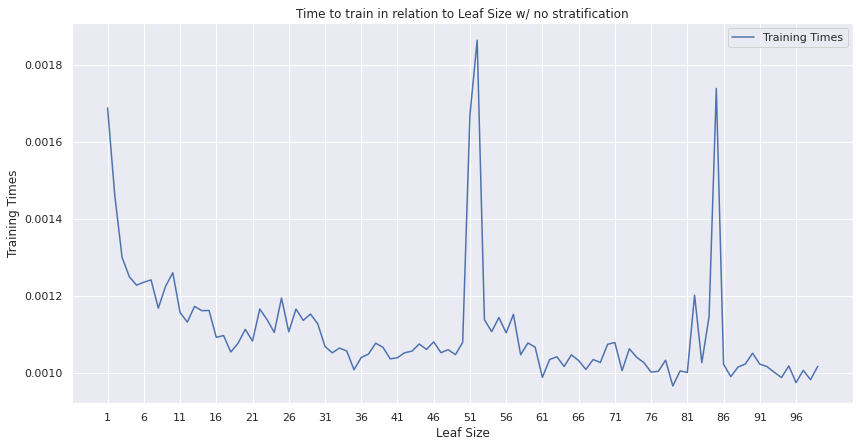

In [ ]:
# find best n_neighbor for KNN

from sklearn.metrics import f1_score
import seaborn as sns
import time

f1_test = []
f1_train = []
times = []

typical_n = 100

for i in range(1, typical_n):
  knn_strat = KNeighborsClassifier(leaf_size=i, n_neighbors=4, algorithm='kd_tree')
  
  start = time.time()
  knn_strat.fit(x_train_strat, y_train_strat.values.ravel())
  end = time.time()

  times.append(end-start)
  
  y_pred_train_strat = knn_strat.predict(x_train_strat)
  f1_train.append(f1_score(y_train_strat, y_pred_train_strat, average='weighted'))
  
  y_pred_test_strat = knn_strat.predict(x_test_strat)
  f1_test.append(f1_score(y_test_strat, y_pred_test_strat, average='weighted'))

# plt.plot(range(1, typical_n), f1_)
# plt.xlabel('K Neighbor Value')
# plt.ylabel('Weighted F1 Score')
# plt.show()

print(f1_test)

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=times, x=range(1, typical_n), label="Training Times")

plt.xticks(ticks=np.arange(1, typical_n, 5))
plt.xlabel('Leaf Size')
plt.ylabel('Training Times')
plt.title('Time to train in relation to Leaf Size w/ no stratification')
plt.show()

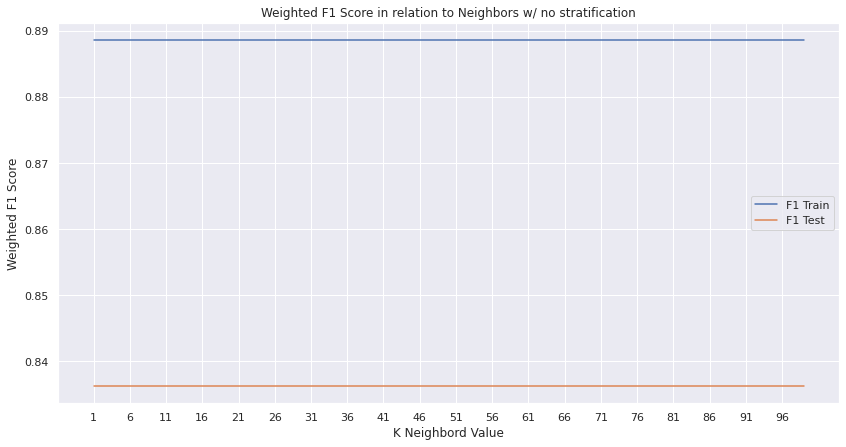

In [ ]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train, x=range(1, typical_n), label="F1 Train")
sns.lineplot(y=f1_test, x=range(1, typical_n), label="F1 Test")
plt.xticks(ticks=np.arange(1, typical_n, 5))
plt.xlabel('K Neighbord Value')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score in relation to Neighbors w/ no stratification')
plt.show()

In [ ]:
model = KNeighborsClassifier(leaf_size=80, n_neighbors=4, algorithm='kd_tree').fit(x_train_strat, y_train_strat.values.ravel())

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("Stratified Metrics")
print("Training weighted F1 on default decision tree params and stratification: " + str(f1_score(y_train, y_train_pred, average='weighted')))
print("Testing weighted F1 on default decision tree params and stratification: " + str(f1_score(y_test, y_test_pred, average='weighted')))

Stratified Metrics
Training weighted F1 on default decision tree params and stratification: 0.8719992986239732
Testing weighted F1 on default decision tree params and stratification: 0.90224043715847


In [ ]:
# using the mobile dataset
# import data from github
url = 'https://raw.githubusercontent.com/taimaruuu/machine-learning/master/assn1/mobile_train.csv?token=ADS73SDPPDJB3ZAZ6EHYGVLBLHUUU'
data_pd = pd.read_csv(url)

# ensure there are no nan fields in the data (if there are any to begin with)
# notice we didn't normalize data for this example because there is no effect on it for DT
data_pd.dropna(axis=0)
data_pd

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
# create X and Y data
x, y = data_pd.iloc[:, :-1], data_pd.iloc[:, -1:]
# print(y)

# # normalize the data 
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# scaled_x = scaler.fit_transform(x)
# scaled_pd = pd.DataFrame(scaled_x, columns=x.columns)
# scaled_pd['price_range'] = y
# data_pd = scaled_pd

# x, y = data_pd.iloc[:, :-1], data_pd.iloc[:, -1:]

# create test / train split with 80 / 20 split respectively without stratifying data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

# create test / train split with 80 / 20 split respectively with stratifying data
x_train_strat, x_test_strat, y_train_strat, y_test_strat = train_test_split(x, y, test_size=0.2, random_state=11, stratify=y)

# data_pd

In [ ]:
no_strat_model = KNeighborsClassifier().fit(x_train, y_train.values.ravel())
strat_model = KNeighborsClassifier().fit(x_train_strat, y_train_strat.values.ravel())

y_train_pred = no_strat_model.predict(x_train)
y_test_pred = no_strat_model.predict(x_test)
print("Non-Stratified Metrics")
print("Training weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_train, y_train_pred, average='weighted')))
print("Testing weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_test, y_test_pred, average='weighted')))

print()

y_train_pred_strat = strat_model.predict(x_train_strat)
y_test_pred_strat = strat_model.predict(x_test_strat)
print("Stratified Metrics")
print("Training weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_train_strat, y_train_pred_strat, average='weighted')))
print("Testing weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_test_strat, y_test_pred_strat, average='weighted')))

Non-Stratified Metrics
Training weighted F1 on default decision tree params and no stratification: 0.9537349359284276
Testing weighted F1 on default decision tree params and no stratification: 0.9350618825404051

Stratified Metrics
Training weighted F1 on default decision tree params and no stratification: 0.9506628547941834
Testing weighted F1 on default decision tree params and no stratification: 0.9121317111817282


[0.9001086077995554, 0.902099540422891, 0.9022755824336126, 0.8943805912365751, 0.9121317111817282, 0.9046966635492104, 0.9022626002694123, 0.9049722965317407, 0.8998584558022468, 0.9049722965317407, 0.9026085481682496, 0.9052739473965227, 0.9101940194019403, 0.9124220029374244, 0.9151611436653869, 0.9003282828282829, 0.9100273811607612, 0.900288208579487, 0.9075286173852749, 0.9027367528425907, 0.9050793776475712, 0.9101362958294407, 0.9001747609055896, 0.902615967881355, 0.9050246594869661, 0.9050342982059401, 0.9024922055051176, 0.902615967881355, 0.8974737736656085, 0.9027577054140685, 0.9100188319635636, 0.9052699182143297, 0.9125650999165851, 0.9101488630255582, 0.9101453330148495, 0.907663991938973, 0.9100188319635636, 0.907663991938973, 0.909969148341882]


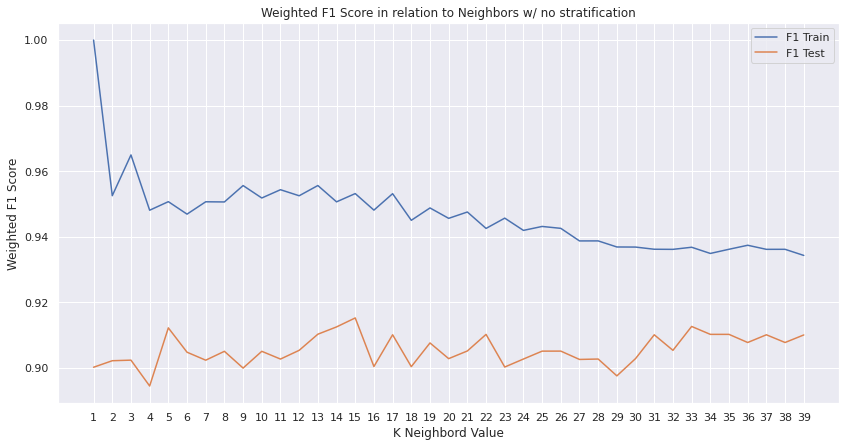

Best Training score is acheived with K = 1 with an F1 weighted score of 1.0


In [ ]:
# find best n_neighbor for KNN

from sklearn.metrics import f1_score
import seaborn as sns

f1_test = []
f1_train = []

typical_n = int(np.sqrt(len(x_train_strat)))

for i in range(1, typical_n):
  knn_strat = KNeighborsClassifier(n_neighbors=i)
  knn_strat.fit(x_train_strat, y_train_strat.values.ravel())
  
  y_pred_train_strat = knn_strat.predict(x_train_strat)
  f1_train.append(f1_score(y_train_strat, y_pred_train_strat, average='weighted'))
  
  y_pred_test_strat = knn_strat.predict(x_test_strat)
  f1_test.append(f1_score(y_test_strat, y_pred_test_strat, average='weighted'))

# plt.plot(range(1, typical_n), f1_)
# plt.xlabel('K Neighbor Value')
# plt.ylabel('Weighted F1 Score')
# plt.show()

print(f1_test)

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train, x=range(1, typical_n), label="F1 Train")
sns.lineplot(y=f1_test, x=range(1, typical_n), label="F1 Test")
plt.xticks(ticks=np.arange(1, typical_n, 1))
plt.xlabel('K Neighbord Value')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score in relation to Neighbors w/ no stratification')
plt.show()

print("Best Training score is acheived with K = " + str(np.argmax(f1_train) + 1) + " with an F1 weighted score of " + str(np.max(f1_train)))

[0.9250323690467769, 0.9000438295094245, 0.9248704444912577, 0.929959533880725, 0.9350618825404051, 0.9399847670726951, 0.9474171159751481, 0.9449886738308806, 0.950023096713935, 0.9450741651990745, 0.9449039061132506, 0.9403176737974178, 0.9425770617229456, 0.9453461792255763, 0.9401556122448979, 0.9326475446758251, 0.9425466529538886, 0.9399371763051856, 0.9449895833333334, 0.9374728907353626, 0.9350408257739418, 0.9326987877197266, 0.9350986302090258, 0.9324970283460507, 0.940070374432093, 0.9300330988455988, 0.9347831795418946, 0.9298160401002507, 0.9347108700231724, 0.9325078811453983, 0.932412769268839, 0.93228103904397, 0.934841057868552, 0.9373541337249585, 0.9344939911448451, 0.934601053100666, 0.9372804131257587, 0.9321682543959109, 0.9321682543959109]


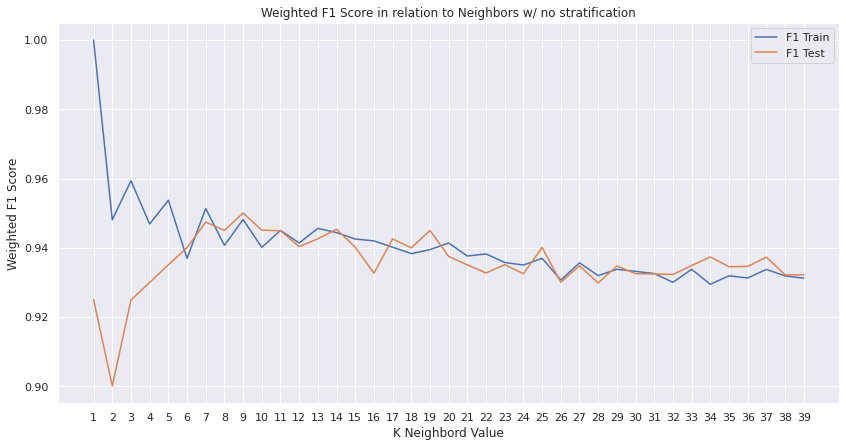

Best Training score is acheived with K = 1 with an F1 weighted score of 1.0


In [ ]:
# find best n_neighbor for KNN

from sklearn.metrics import f1_score
import seaborn as sns

f1_test = []
f1_train = []

typical_n = int(np.sqrt(len(x_train)))

for i in range(1, typical_n):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train.values.ravel())
  
  y_pred_train = knn.predict(x_train)
  f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))
  
  y_pred_test = knn.predict(x_test)
  f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))

# plt.plot(range(1, typical_n), f1_)
# plt.xlabel('K Neighbor Value')
# plt.ylabel('Weighted F1 Score')
# plt.show()

print(f1_test)

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train, x=range(1, typical_n), label="F1 Train")
sns.lineplot(y=f1_test, x=range(1, typical_n), label="F1 Test")
plt.xticks(ticks=np.arange(1, typical_n, 1))
plt.xlabel('K Neighbord Value')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score in relation to Neighbors w/ no stratification')
plt.show()

print("Best Training score is acheived with K = " + str(np.argmax(f1_train) + 1) + " with an F1 weighted score of " + str(np.max(f1_train)))

[0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051, 0.9350618825404051,

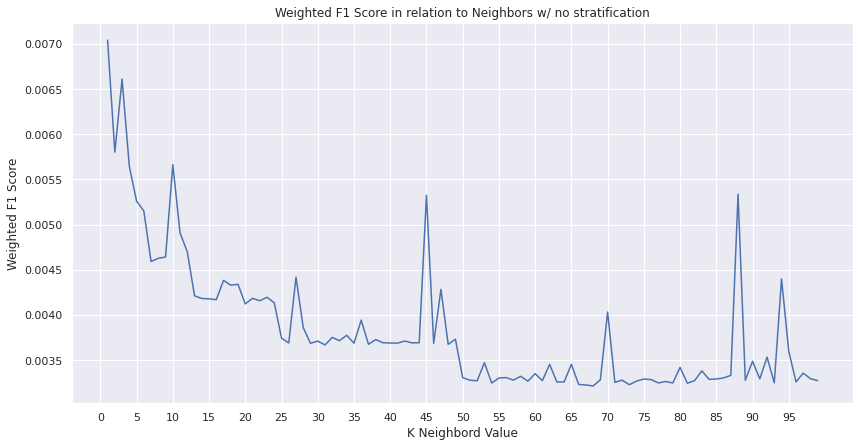

Best Training score is acheived with K = 1 with an F1 weighted score of 0.9537349359284276


In [ ]:
# find best n_neighbor for KNN

from sklearn.metrics import f1_score
import seaborn as sns
import time

f1_test = []
f1_train = []
times = []

typical_n = 100

for i in range(1, typical_n):
  knn = KNeighborsClassifier(leaf_size=i, n_neighbors=9)
  
  start = time.time()
  knn.fit(x_train, y_train.values.ravel())
  end = time.time()
  
  y_pred_train = knn.predict(x_train)
  f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))
  
  y_pred_test = knn.predict(x_test)
  f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))

  times.append(end-start)

# plt.plot(range(1, typical_n), f1_)
# plt.xlabel('K Neighbor Value')
# plt.ylabel('Weighted F1 Score')
# plt.show()

print(f1_test)

sns.set()
plt.figure(figsize=(14,7))
# sns.lineplot(y=f1_train, x=range(1, typical_n), label="F1 Train")
# sns.lineplot(y=f1_test, x=range(1, typical_n), label="F1 Test")
sns.lineplot(y=times, x=range(1, typical_n))
plt.xticks(ticks=np.arange(0, typical_n, 5))
plt.xlabel('K Neighbord Value')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score in relation to Neighbors w/ no stratification')
plt.show()

print("Best Training score is acheived with K = " + str(np.argmax(f1_train) + 1) + " with an F1 weighted score of " + str(np.max(f1_train)))

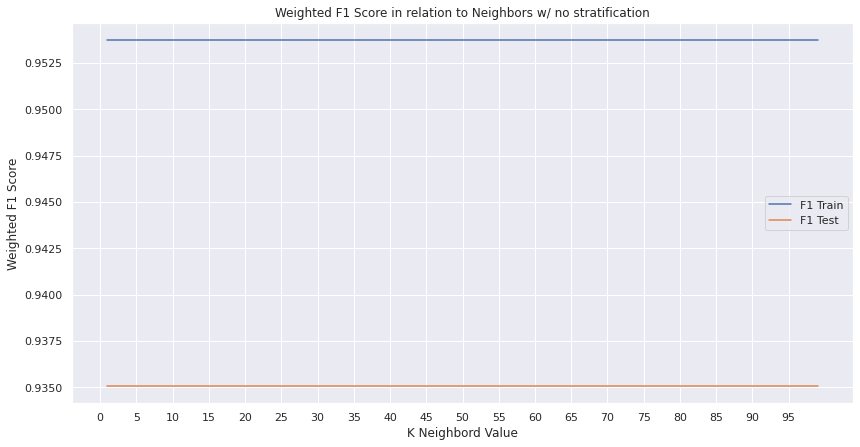

In [ ]:
sns.set() 
plt.figure(figsize=(14,7)) 
sns.lineplot(y=f1_train, x=range(1, typical_n), label="F1 Train") 
sns.lineplot(y=f1_test, x=range(1, typical_n), label="F1 Test")

plt.xticks(ticks=np.arange(0, typical_n, 5)) 
plt.xlabel('K Neighbord Value') 
plt.ylabel('Weighted F1 Score') 
plt.title('Weighted F1 Score in relation to Neighbors w/ no stratification') 
plt.show()

In [ ]:
strat_model = KNeighborsClassifier(n_neighbors=7, leaf_size=20).fit(x_train, y_train.values.ravel())

y_train_pred = strat_model.predict(x_train)
y_test_pred = strat_model.predict(x_test)
print("Stratified Metrics")
print("Training weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_train, y_train_pred, average='weighted')))
print("Testing weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_test, y_test_pred, average='weighted')))

Stratified Metrics
Training weighted F1 on default decision tree params and no stratification: 0.9506263295320925
Testing weighted F1 on default decision tree params and no stratification: 0.9022626002694123
